<a href="https://colab.research.google.com/github/syh0397/DataAnalyst_Study/blob/main/%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EB%A7%88%EC%9D%B4%EB%8B%9D_%ED%9C%B4%EB%A6%AC%EC%8A%A4%ED%8B%B1%EB%A7%88%EC%9D%B4%EB%84%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=5fb0325ab0ef81cae1161ee299a9a43ff1796efa16901bd078a7756d988d2713
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16966 sha256=e9aea081ae4169a68a3e24cdde22c05a863e20fab40063ffc8ef3f63e0ad0f12
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [2]:
# data
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining/프로세스 하루 .csv
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map

from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/프로세스 하루 .csv', engine='python', encoding='utf-8', error_bad_lines=False)

# df = dataframe_utils.convert_timestamp_columns_in_df(df)


<ipython-input-3-2c257d147914>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/data/프로세스 하루 .csv', engine='python', encoding='utf-8', error_bad_lines=False)


In [4]:
df_copy = df.copy()
df_copy = df_copy.drop(columns = 'refer_desc', axis = 1 )
df_copy = df_copy.drop(columns = 'tracking_seq', axis = 1 )
df_copy = df_copy.drop(columns = 'banner_seq', axis = 1 )
df_copy = df_copy.drop(columns = 'refer_id', axis = 1 )
df_copy

,cust_seq,tracking_cd,reg_dttm
0,73,76,2023-07-13 17:00:42
1,73,800000103,2023-07-13 17:00:44
2,73,800000161,2023-07-13 17:00:52
3,73,800000162,2023-07-13 17:00:52
4,73,500000001,2023-07-13 17:00:54
...,...,...,...
1670645,933881,529,2023-07-13 23:59:58
1670646,933882,143,2023-07-13 23:59:46
1670647,933882,100100003,2023-07-13 23:59:52
1670648,933882,100100008,2023-07-13 23:59:54


In [5]:
df_copy.columns = ["case:concept:name", "concept:name" , "time:timestamp"]
df_copy

,case:concept:name,concept:name,time:timestamp
0,73,76,2023-07-13 17:00:42
1,73,800000103,2023-07-13 17:00:44
2,73,800000161,2023-07-13 17:00:52
3,73,800000162,2023-07-13 17:00:52
4,73,500000001,2023-07-13 17:00:54
...,...,...,...
1670645,933881,529,2023-07-13 23:59:58
1670646,933882,143,2023-07-13 23:59:46
1670647,933882,100100003,2023-07-13 23:59:52
1670648,933882,100100008,2023-07-13 23:59:54


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670650 entries, 0 to 1670649
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   case:concept:name  1670650 non-null  int64 
 1   concept:name       1670650 non-null  int64 
 2   time:timestamp     1670650 non-null  object
dtypes: int64(2), object(1)
memory usage: 38.2+ MB


In [7]:
df_copy['concept:name'] = df_copy['concept:name'].astype(float)

In [8]:
cond = df_copy['concept:name'] < 900000990
df_copy = df_copy[cond]
df_copy

,case:concept:name,concept:name,time:timestamp
0,73,76.0,2023-07-13 17:00:42
1,73,800000103.0,2023-07-13 17:00:44
2,73,800000161.0,2023-07-13 17:00:52
3,73,800000162.0,2023-07-13 17:00:52
4,73,500000001.0,2023-07-13 17:00:54
...,...,...,...
1670645,933881,529.0,2023-07-13 23:59:58
1670646,933882,143.0,2023-07-13 23:59:46
1670647,933882,100100003.0,2023-07-13 23:59:52
1670648,933882,100100008.0,2023-07-13 23:59:54


In [9]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the data

# Convert 'case:concept:name' column to object type
df_copy['case:concept:name'] = df_copy['case:concept:name'].astype(str)

# Convert 'concept:name' column to object type
df_copy['concept:name'] = df_copy['concept:name'].astype(int)
df_copy['concept:name'] = df_copy['concept:name'].astype(str)

# Convert 'time:timestamp' column to datetime type
df_copy['time:timestamp'] = pd.to_datetime(df_copy['time:timestamp'])

# Optional: You can specify the date format if your timestamp column has a specific format
# df['time:timestamp'] = pd.to_datetime(df['time:timestamp'], format='%Y-%m-%d %H:%M:%S')

# Verify the updated data types
print(df_copy.dtypes)


<ipython-input-9-7f971c77bf18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['case:concept:name'] = df_copy['case:concept:name'].astype(str)
<ipython-input-9-7f971c77bf18>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['concept:name'] = df_copy['concept:name'].astype(int)
<ipython-input-9-7f971c77bf18>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

case:concept:name            object
concept:name                 object
time:timestamp       datetime64[ns]
dtype: object


<ipython-input-9-7f971c77bf18>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['time:timestamp'] = pd.to_datetime(df_copy['time:timestamp'])


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500396 entries, 0 to 1670649
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   case:concept:name  1500396 non-null  object        
 1   concept:name       1500396 non-null  object        
 2   time:timestamp     1500396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 45.8+ MB


In [11]:
# df = df.sort_values('reg_dttm:timestamp')

log = log_converter.apply(df_copy)
log

[{'attributes': {'concept:name': '73'}, 'events': [{'concept:name': '76', 'time:timestamp': Timestamp('2023-07-13 17:00:42')}, '..', {'concept:name': '200000057', 'time:timestamp': Timestamp('2023-07-13 17:12:56')}]}, '....', {'attributes': {'concept:name': '933882'}, 'events': [{'concept:name': '143', 'time:timestamp': Timestamp('2023-07-13 23:59:46')}, '..', {'concept:name': '100100005', 'time:timestamp': Timestamp('2023-07-13 23:59:56')}]}]

# 휴리스틱 마이너

- 기본적으로 frequency(이벤트와 flow의 빈도)와 이를 바탕으로 한 dependency를 고려하여 맵을 생성합니다. Heuristic mining은 알파 알고리즘과는 다르게 빈도수를 고려할 수 있고, single activity, 즉 프로세스가 두 단계 이상 존재하지 않고 하나의 작업으로만 구성된 케이스를 생략할 수 있다는 장점을 가지고 있습니다.

In [13]:
# activity 목록 도출
from pm4py.algo.filtering.pandas.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(df_copy, attribute_key="concept:name")
activities

{'100400007': 229570,
 '800000103': 183261,
 '76': 78948,
 '800000149': 72225,
 '800000152': 66577,
 '800000161': 56695,
 '800000162': 56283,
 '527': 56190,
 '100400001': 49477,
 '100400002': 46829,
 '444444444': 37976,
 '92': 34152,
 '84': 30199,
 '231': 30155,
 '254': 19514,
 '77': 17203,
 '91': 15084,
 '93': 13189,
 '800000079': 11260,
 '211': 10175,
 '98': 8698,
 '442': 8243,
 '79': 6498,
 '85': 6128,
 '349': 6101,
 '500000001': 6024,
 '800000073': 5922,
 '200000046': 5515,
 '300100005': 5296,
 '300100006': 5293,
 '100100032': 5293,
 '266': 5288,
 '90': 4916,
 '263': 4876,
 '80': 4765,
 '175': 4753,
 '800000140': 4683,
 '200000044': 4372,
 '455': 4030,
 '78': 3796,
 '224': 3787,
 '472': 3786,
 '473': 3780,
 '200000057': 3730,
 '200000001': 3707,
 '200000047': 3685,
 '355': 3657,
 '143': 3413,
 '242': 3382,
 '43': 3364,
 '100100052': 3248,
 '100100035': 3247,
 '279': 3241,
 '468': 2980,
 '800000146': 2970,
 '483': 2938,
 '484': 2932,
 '100100033': 2886,
 '485': 2885,
 '289': 2802,
 

- Dependency Threshold : Dependency가 설정한 threshold보다 높은 것만을 표시 (default: 0.5)
- MIN_ACT_COUNT : 최소 activity 숫자 (default: 1)
- MIN_DFG_OCCURRENCES : edge에 최소 몇번이상언급된 요소들만 남길지 (default: 1)
- DFG_PRE_CLEANING_NOISE_THRESH : in order to remove weaker edges, default 0.05
- LOOP_LENGTH_TWO_THRESH : length가 2인 루프 (a -> b -> a)에 대한 필터링을 위한 threshold
- LOOP_LENGTH_ONE_THRESH : length가 1인 루프 (a -> a)에 대한 필터링을 위한 threshold


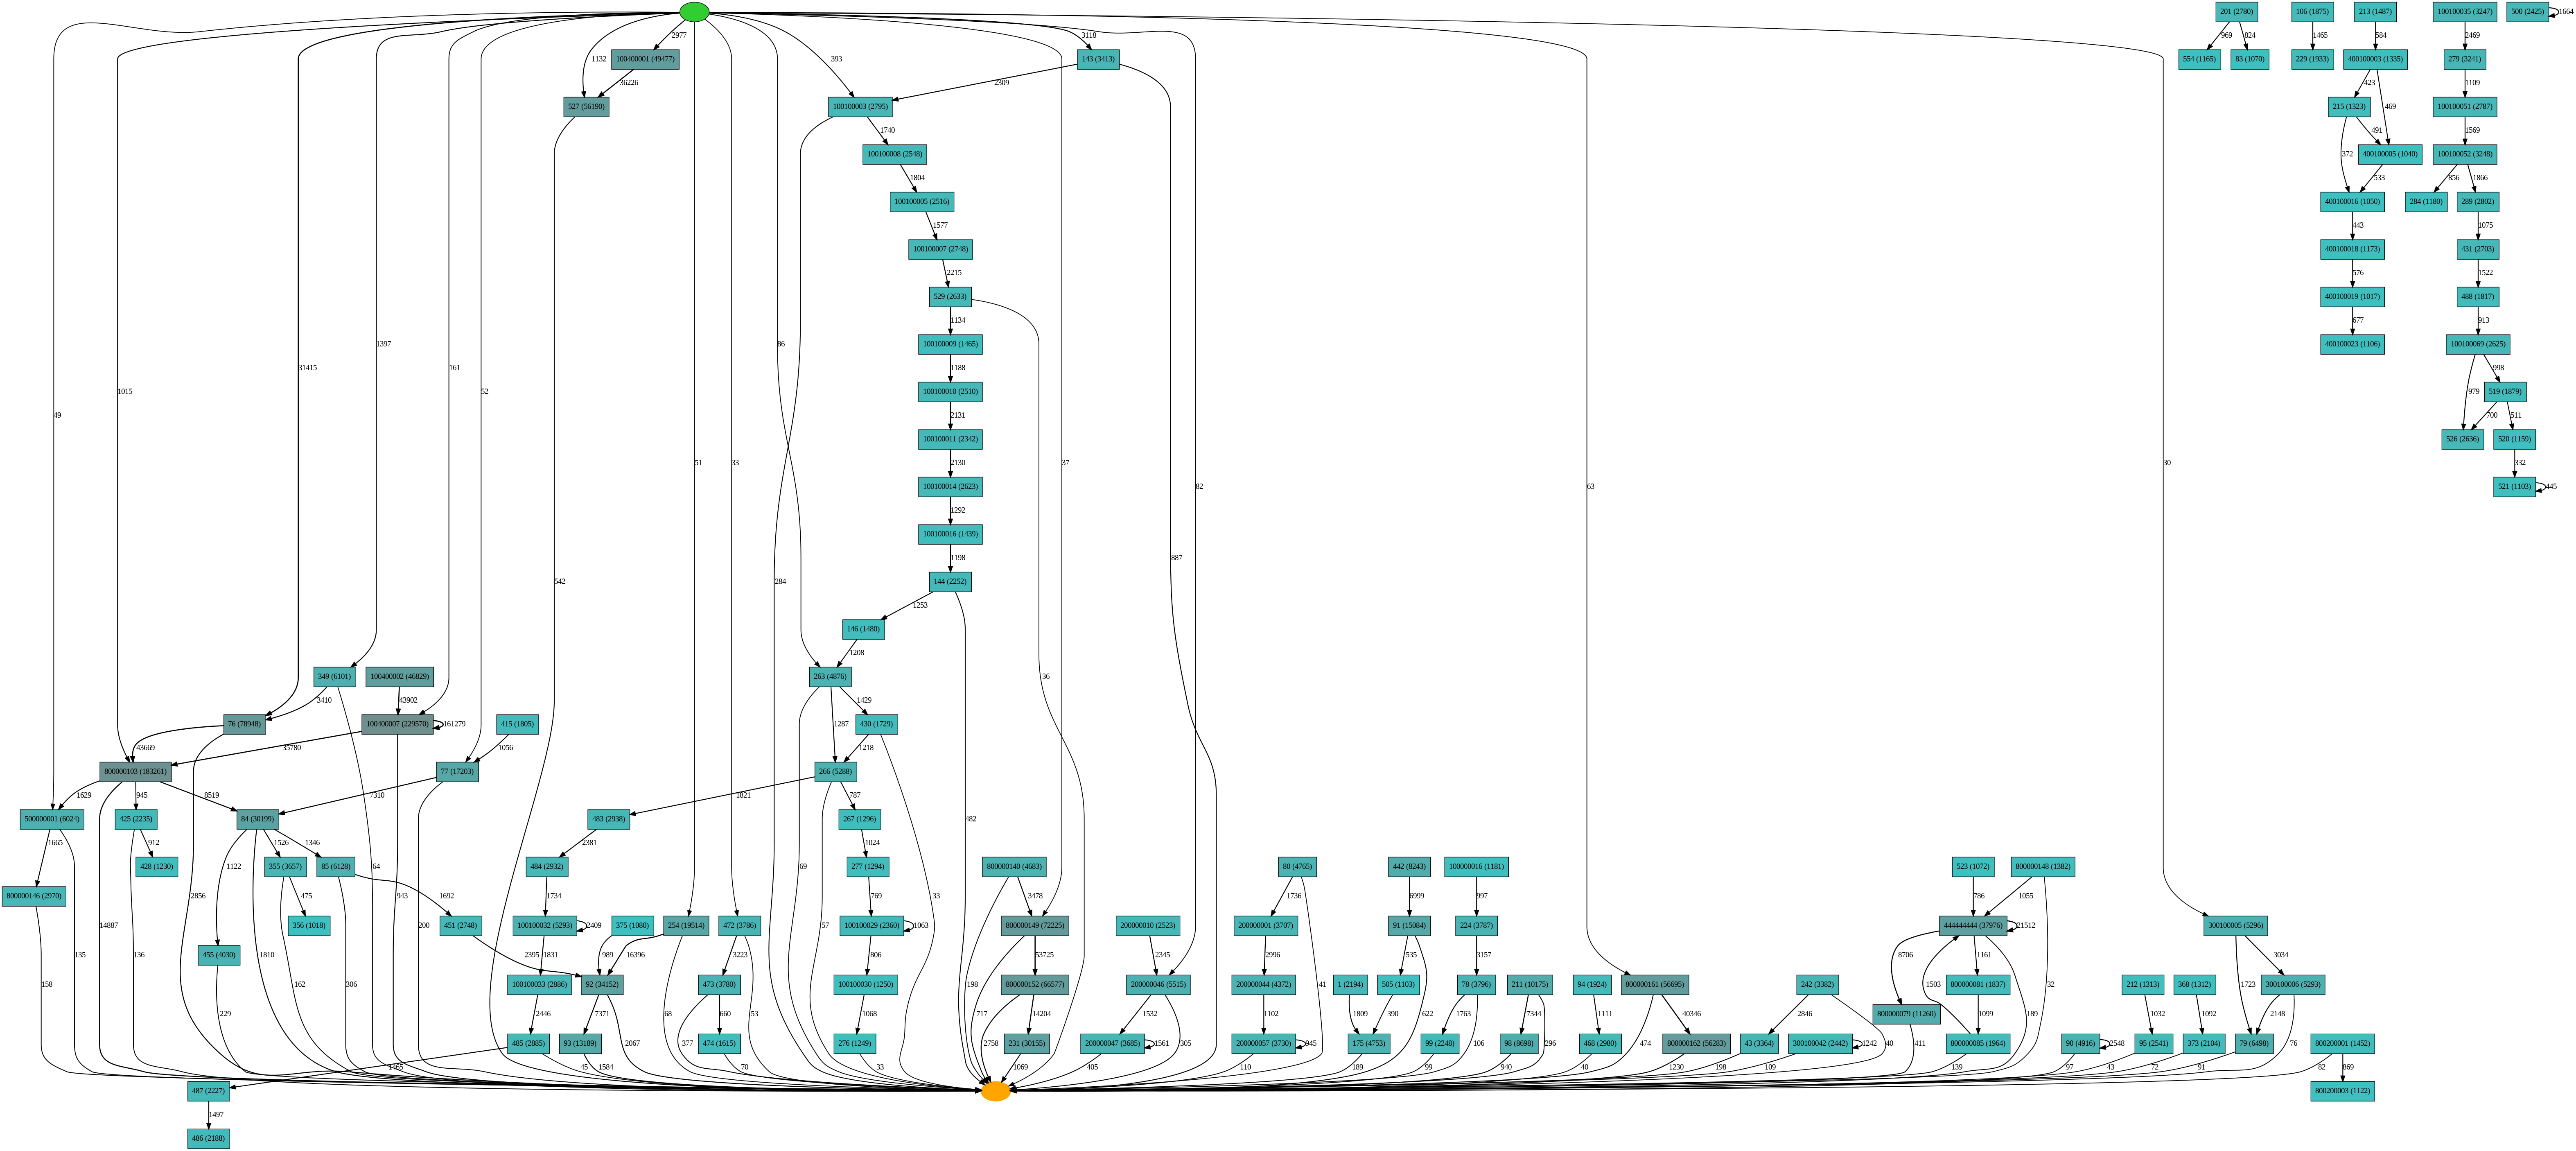

In [15]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.90,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 1000,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES : 30,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.7,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 3
                                                            })
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

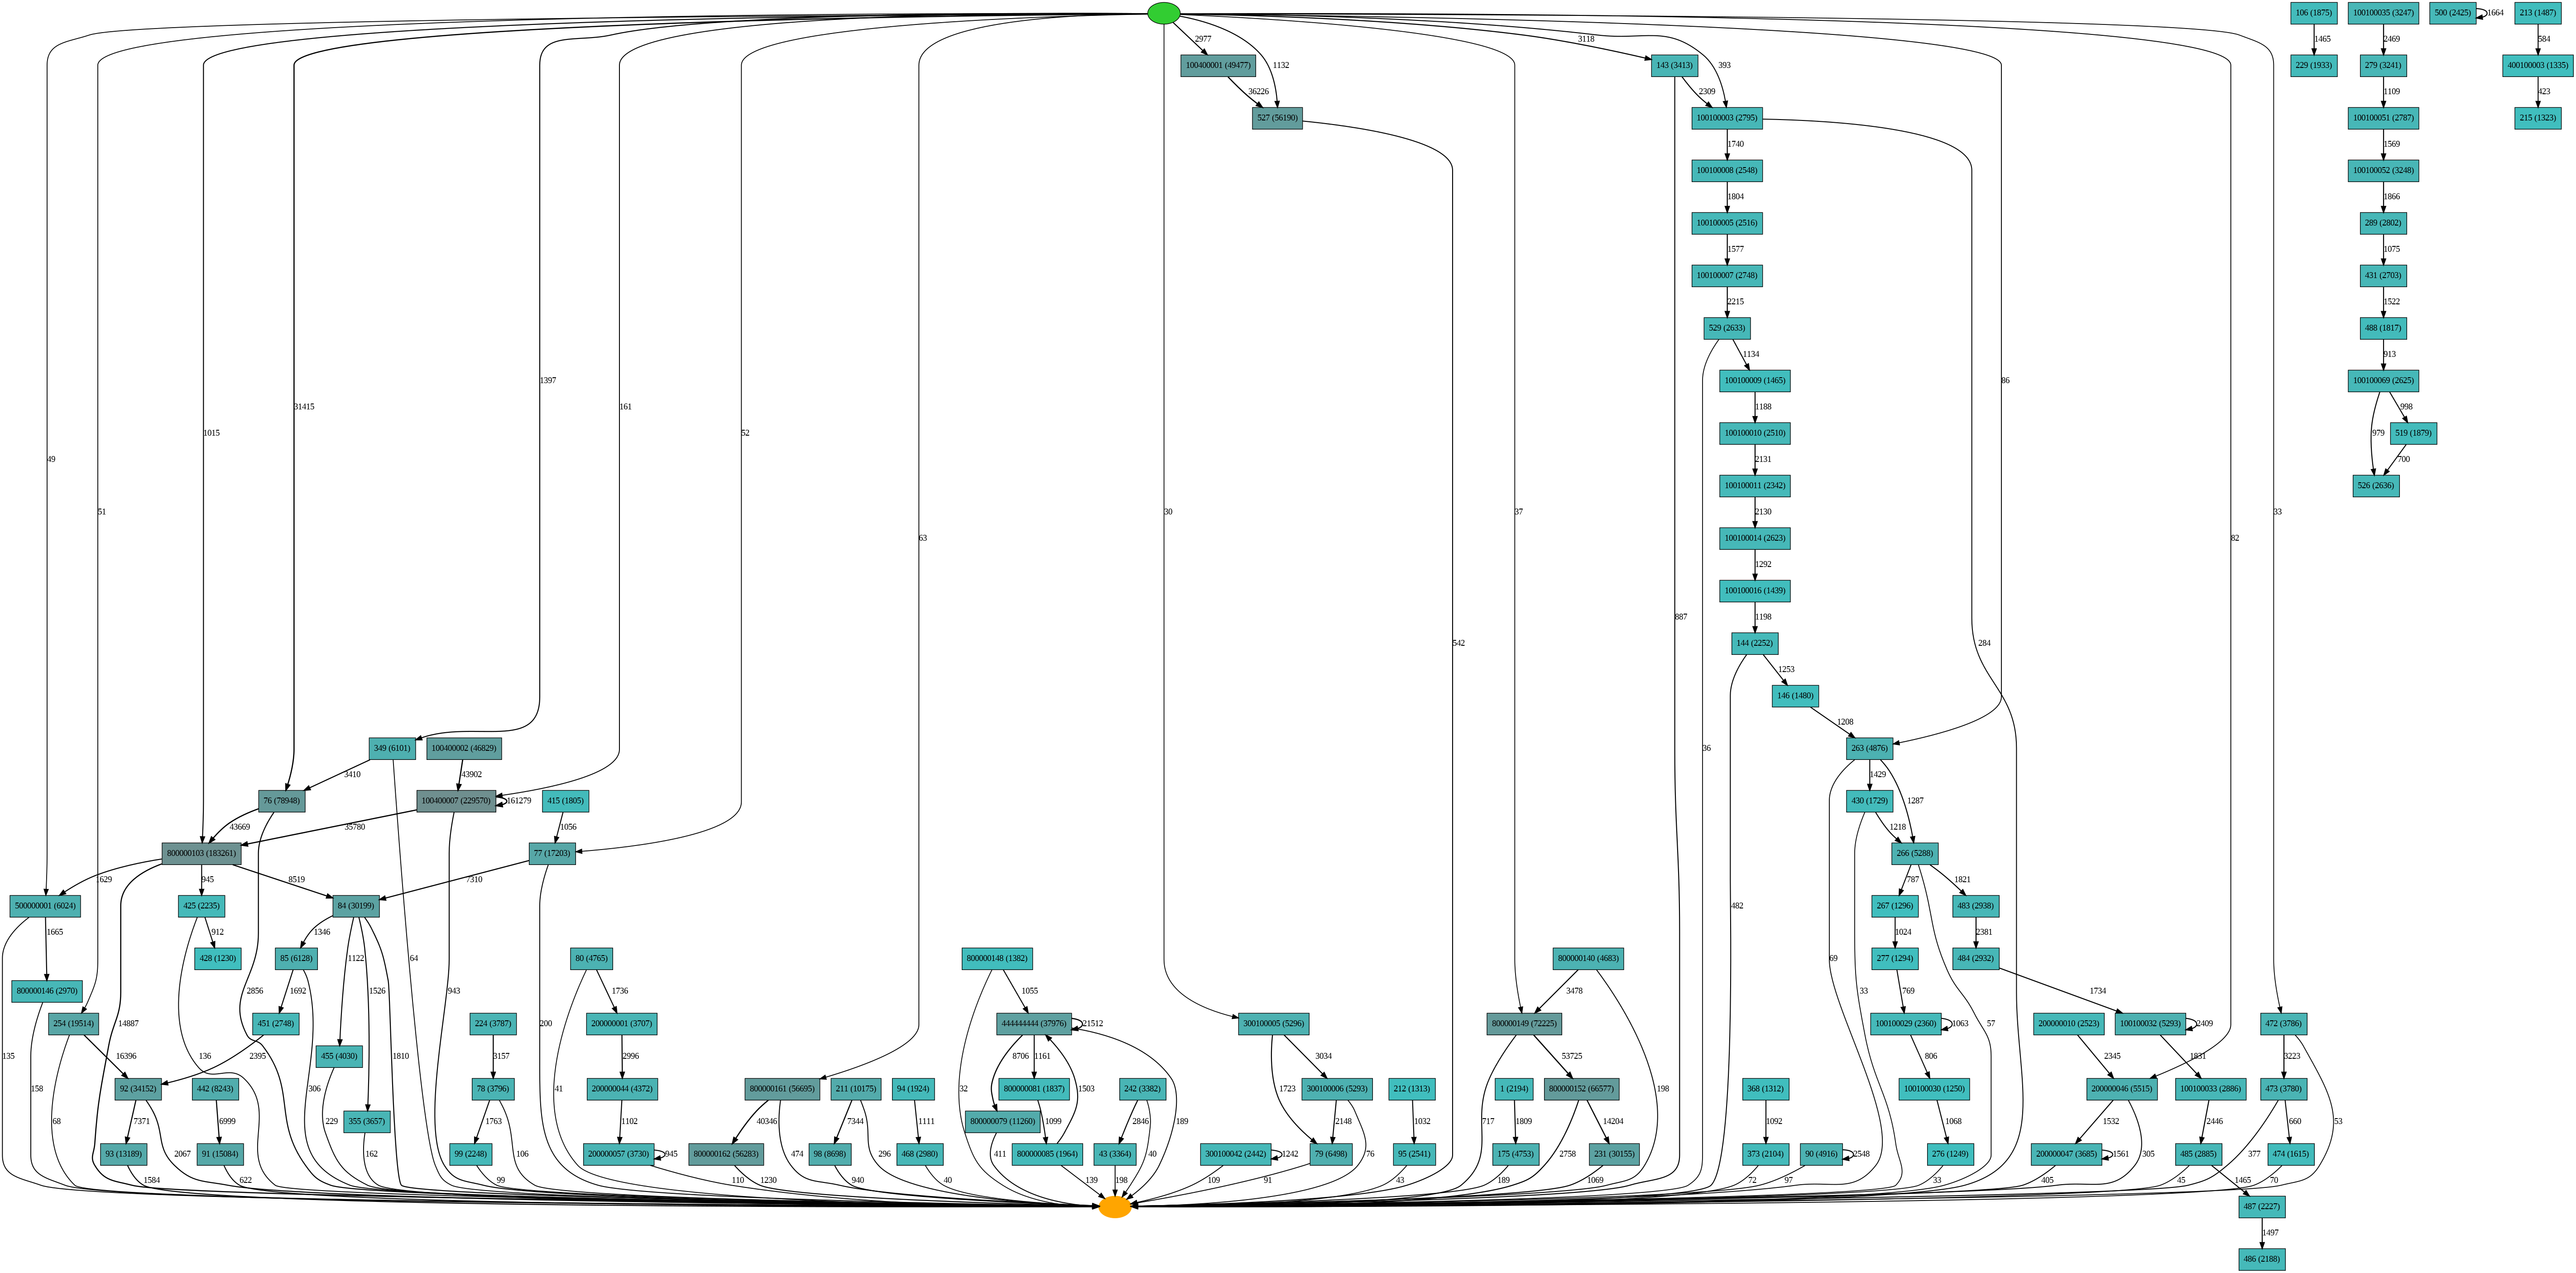

In [14]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.90,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 1200,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES : 30,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.7,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 3
                                                            })
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [30]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.90,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 1500,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES : 30,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.8,
                                                            heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 3
                                                            })

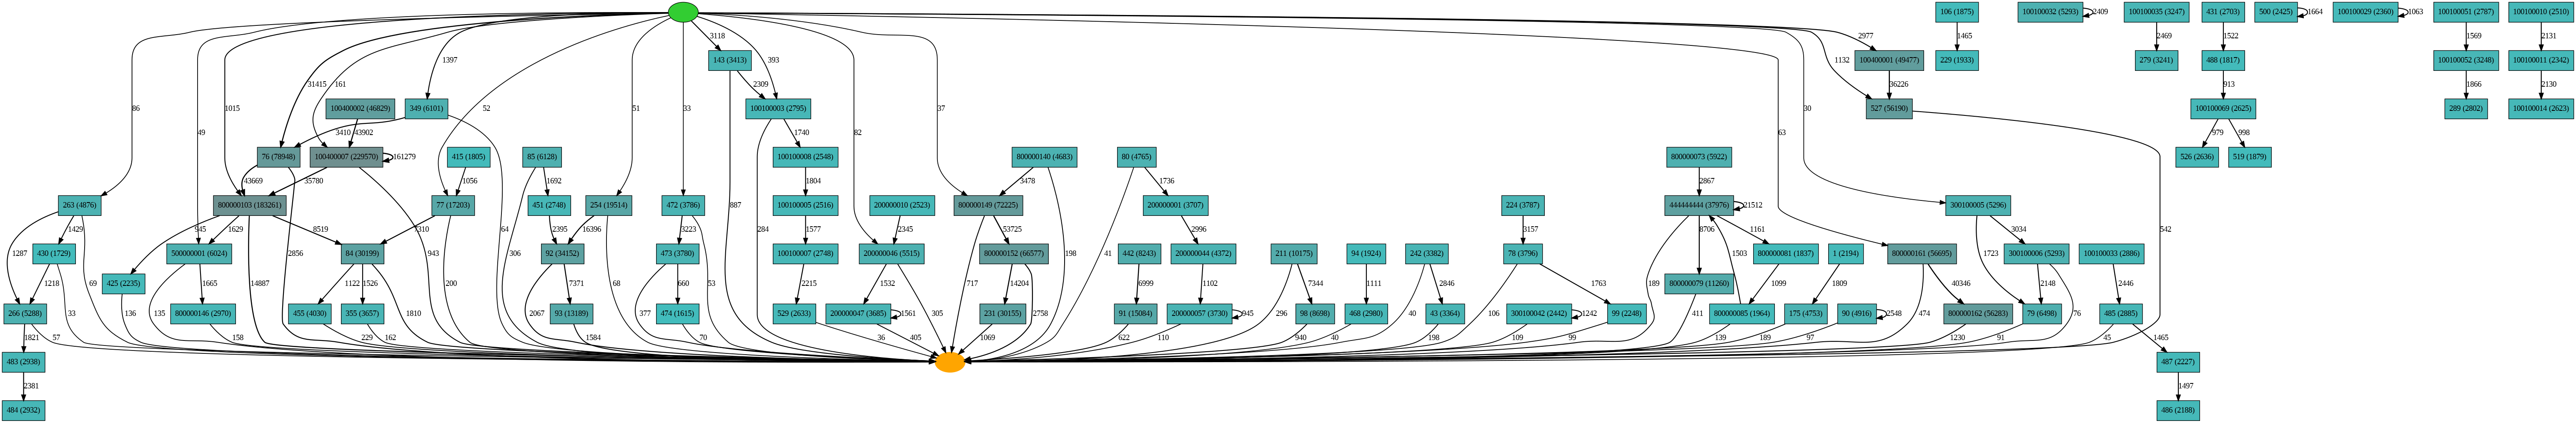

# alpha_miner

In [ ]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)


In [ ]:

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [ ]:
# add information about frequency to the viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)

# save the Petri net
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

replaying log with TBR, completed variants ::   0%|          | 0/37566 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
 # heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

TypeError: ignored

In [ ]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

TypeError: ignored